# Import Libraries

In [200]:
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings('ignore') # to ignore all of the warnings when run the code

In [201]:
# to know where this file is save
import os
os.getcwd()

'/Users/salsabilafcr/Documents/DATA ANALYTICS/Projects/Python Project/Project'

# Import Dataset

In [202]:
df = pd.read_csv('/Users/salsabilafcr/Documents/DATA ANALYTICS/Projects/Python Project/Data/Online Retail Data.csv', header = 0)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


# Data Cleaning

In [204]:
df_clean = df.copy()

In [205]:
# convert order_date column to datetime
df_clean['order_date'] = df_clean['order_date'].astype('datetime64[ns]')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      461773 non-null  object        
 1   product_code  461773 non-null  object        
 2   product_name  459055 non-null  object        
 3   quantity      461773 non-null  int64         
 4   order_date    461773 non-null  datetime64[ns]
 5   price         461773 non-null  float64       
 6   customer_id   360853 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.7+ MB


In [206]:
# create year_month column
df_clean['year_month'] = df_clean['order_date'].dt.to_period('M')
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,2010-01
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,2010-01
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,2010-01
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,2010-01
...,...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN,2010-12
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN,2010-12
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN,2010-12
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN,2010-12


In [207]:
# remove null value in customer_id column
df_clean = df_clean[~df_clean['customer_id'].isna()]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360853 entries, 0 to 461744
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360853 non-null  object        
 1   product_code  360853 non-null  object        
 2   product_name  360853 non-null  object        
 3   quantity      360853 non-null  int64         
 4   order_date    360853 non-null  datetime64[ns]
 5   price         360853 non-null  float64       
 6   customer_id   360853 non-null  float64       
 7   year_month    360853 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 24.8+ MB


In [208]:
# makes all product_name columns lowercase
df_clean['product_name'] = df_clean['product_name'].str.lower()
df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month
0,493410,TEST001,this is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,2010-01
1,C493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01
2,493412,TEST001,this is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,2010-01
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01


In [209]:
# remove all rows with product_code or product_name 'test'
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test'))|
                   (~df_clean['product_name'].str.lower().str.contains('test'))]
df_clean.tail()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month
461740,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,2010-12
461741,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12
461742,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12
461743,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,2010-12
461744,539988,47559B,tea time oven glove,2,2010-12-23 16:06:00,1.25,18116.0,2010-12


In [210]:
# create an order_status column with the value 'canceled' if the order_id begins with the letter 'c' and 
# 'delivered' if the order_id does not begin with the letter 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1] == 'C', 'cancelled', 'delivered')
df_clean.head(3)

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status
1,C493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered


In [211]:
# change the negative quantity value to positive because the negative value only indicates 
# that the order is canceled.
df_clean['quantity'] = df_clean['quantity'].abs()
df_clean.head(3)

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status
1,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered


In [212]:
# creates an amount value, which is the multiplication of quantity and price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']
df_clean.sample(3)

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
252611,520405,85168B,black baroque carriage clock,2,2010-08-25 17:27:00,9.95,17338.0,2010-08,delivered,19.90
279631,523321,22908,pack of 20 napkins red apples,12,2010-09-21 13:40:00,0.85,17046.0,2010-09,delivered,10.20
71916,501133,47570,english rose table cloth,3,2010-03-14 10:10:00,10.65,17920.0,2010-03,delivered,31.95


In [213]:
# replace the product_name of a product_code that has multiple product_names 
# with one of its most frequently occurring product_names
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')
df_clean.sample(3)

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
65096,502610,72741,grand chocolatecandle,45,2010-03-25 14:06:00,1.45,13408.0,2010-03,delivered,65.25
232928,524577,22083,paper chain kit retro spot,6,2010-09-29 16:14:00,2.95,16202.0,2010-09,delivered,17.70
14453,495504,21812,garland with hearts and bells,1,2010-01-25 13:14:00,4.95,16795.0,2010-01,delivered,4.95


In [214]:
# convert customer_id column to string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360842 entries, 0 to 360841
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360842 non-null  object        
 1   product_code  360842 non-null  object        
 2   product_name  360842 non-null  object        
 3   quantity      360842 non-null  int64         
 4   order_date    360842 non-null  datetime64[ns]
 5   price         360842 non-null  float64       
 6   customer_id   360842 non-null  object        
 7   year_month    360842 non-null  period[M]     
 8   order_status  360842 non-null  object        
 9   amount        360842 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 27.5+ MB


In [215]:
# remove outliers
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01,delivered,8.50
...,...,...,...,...,...,...,...,...,...,...
358477,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,2010-12,delivered,1.25
358478,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,delivered,1.69
358479,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,delivered,1.69
358480,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,2010-12,delivered,9.90


# User Retention Cohort

In [216]:
df_user_monthly = df_clean.groupby(['customer_id','year_month'], as_index = False).agg(order_cnt = ('order_id','nunique'))
df_user_monthly

,customer_id,year_month,order_cnt
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1
...,...,...,...
12039,18286.0,2010-06,1
12040,18286.0,2010-08,1
12041,18287.0,2010-05,1
12042,18287.0,2010-09,2


Calculate the number of orders of each customer per month.

In [217]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')
df_user_monthly

,customer_id,year_month,order_cnt,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
12039,18286.0,2010-06,1,2010-06
12040,18286.0,2010-08,1,2010-06
12041,18287.0,2010-05,1,2010-05
12042,18287.0,2010-09,2,2010-05


Create a cohort column to find out in which month the customer first made a purchase.

In [218]:
from operator import attrgetter
df_user_monthly['period_num'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,customer_id,year_month,order_cnt,cohort,period_num
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12039,18286.0,2010-06,1,2010-06,1
12040,18286.0,2010-08,1,2010-06,3
12041,18287.0,2010-05,1,2010-05,1
12042,18287.0,2010-09,2,2010-05,5


Calculates the distance between the month of the transaction and the month of the first transaction, and adds it to 1 so that the distance of month 0 becomes 1 etc. Using 'attrgetter' to retrieve the month distance value only.

In [219]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index = 'cohort', columns = 'period_num',
                                values = 'customer_id', aggfunc = pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,713.0,280.0,334.0,313.0,305.0,304.0,293.0,268.0,285.0,319.0,335.0,249.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,159.0,153.0,166.0,100.0,NaN
2010-03,528.0,146.0,158.0,145.0,140.0,123.0,149.0,186.0,193.0,96.0,NaN,NaN
2010-04,326.0,82.0,75.0,63.0,69.0,79.0,98.0,101.0,50.0,NaN,NaN,NaN
2010-05,274.0,55.0,50.0,52.0,52.0,72.0,67.0,43.0,NaN,NaN,NaN,NaN
2010-06,266.0,53.0,56.0,60.0,65.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,179.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,227.0,64.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a pivot table with an index of 'cohort' (user with first transaction), columns of 'period_num' (distance between transaction and first transaction), and values of 'customer_id' to count the number of unique users.

In [220]:
cohort_size = df_cohort_pivot.iloc[:, 0]
cohort_size

cohort
2010-01    713.0
2010-02    461.0
2010-03    528.0
2010-04    326.0
2010-05    274.0
2010-06    266.0
2010-07    179.0
2010-08    160.0
2010-09    227.0
2010-10    362.0
2010-11    327.0
2010-12     66.0
Freq: M, Name: 1, dtype: float64

In [221]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis = 0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.392707,0.468443,0.438990,0.427770,0.426367,0.410940,0.375877,0.399719,0.447405,0.469846,0.349229
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.344902,0.331887,0.360087,0.216920,NaN
2010-03,1.0,0.276515,0.299242,0.274621,0.265152,0.232955,0.282197,0.352273,0.365530,0.181818,NaN,NaN
2010-04,1.0,0.251534,0.230061,0.193252,0.211656,0.242331,0.300613,0.309816,0.153374,NaN,NaN,NaN
2010-05,1.0,0.200730,0.182482,0.189781,0.189781,0.262774,0.244526,0.156934,NaN,NaN,NaN,NaN
2010-06,1.0,0.199248,0.210526,0.225564,0.244361,0.319549,0.146617,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.212291,0.206704,0.290503,0.296089,0.167598,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.281938,0.264317,0.136564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert the retention rate value into a percentage by counting the number of users from each cohort (first-time users in that month) and dividing by all the values in the pivot table according to the index row.

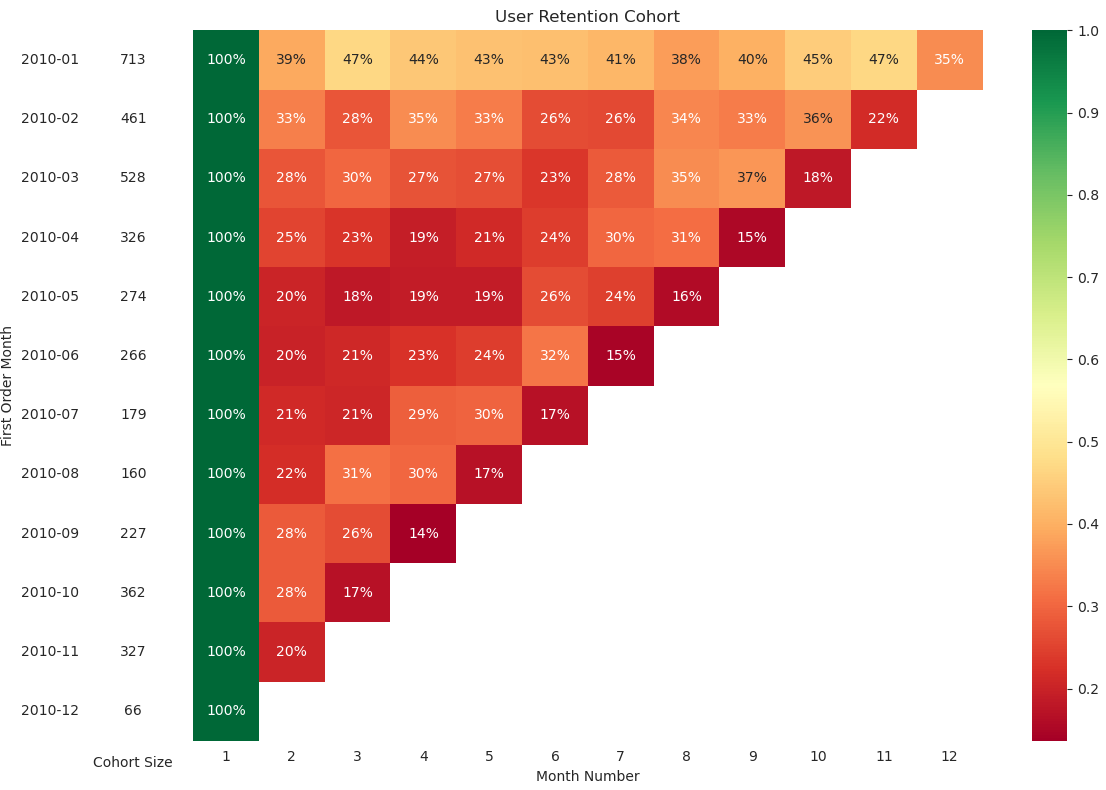

In [244]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

    fig.tight_layout()

Finally, visualize the results of the pivot table that already contains the retention rate value in a heatmap.

# Insight From User Retention Cohort

There are several things we can analyze from the cohort table.
1. The most users first transacted in January 2010, which was 713 users.
2. This cohort of users (January 2010) also transacted the most in their 2nd month (39% retention rate) compared to other cohorts.
3. In addition, this cohort (January 2010) was also the most loyal to transact during the following months with a retention rate of +- 40%.
4. Unfortunately, most users did not return to transact, as evidenced by the retention rate of each cohort and month being less than 50%.
5. Worryingly, the retention rate in December 2010 (diagonally) was the lowest for all user cohorts compared to previous months.